Working model of the solar system. Includes the sun in its calculations. Uses the integration from the wiki.

In [1]:
bodies = ["Sun", "Mercury", "Venus", "Earth", "Mars", "Jupiter", "Saturn", "Uranus", "Neptune", "Pluto"]
masses = [1.989e30 ,0.330e24,4.87e24,5.97e24,0.642e24,1898e24,568e24,86.8e24,102e24,0.0146e24]
x = [0., -1.407280799640445E-01 , -7.186302169039649E-01, -1.685246489174995E-01, 1.390361066087240E+00, 4.003460488693537E+00, 6.408556036146941E+00, 1.443051758274212E+01, 1.681075772645494E+01, -9.876867451525346E+00]
y = [0., -4.439009577663330E-01, -2.250380105571625E-02, 9.687833048228511E-01, -2.100972123734226E-02, 2.935353187887882E+00, 6.568042755297438E+00, -1.373565828163257E+01, -2.499265127854257E+01, -2.795802118693108E+01] 
z = [0., -2.334555971312334E-02, 4.117184137682463E-02, -4.120973411130758E-06, -3.461801385164819E-02, -1.018230443988181E-01, -3.691272890761793E-01, -2.474809404498369E-05, 1.272705717438095E-01, 5.850814657388042E+00]
vx = [0., 2.116887137167173E-02, 5.135327579269579E-04, -1.723394583068879E-02, 7.479271243289054E-04, -4.563750795379206E-03, -4.290540499848893E-03, 2.678466083136532E-03, 2.579216849517761E-03, 3.039016380795775E-03]
vy = [0., -7.097975438870807E-03, -2.030614162239802E-02, -3.007660259271771E-03, 1.518629867736057E-02, 6.447274222742638E-03, 3.891990891483582E-03, 2.672427506613704E-03, 1.776355179608279E-03, -1.529879110198215E-03]
vz = [0., -2.522830951443754E-03, -3.071745100210852E-04, 3.562931614781975E-08, 2.997531995727463E-04, 7.547009668026901E-05, 1.026097521772974E-04, -2.474809404498369E-05, -9.620004658366438E-05, -7.172417049506235E-04]
def init_cond(bodies,x,y,z,vx,vy,vz,masses):
    # x,y,z in AU and vx,vy,vz in AU/d
    init_cond_array = []
    for n in range(len(bodies)):
            init_cond_array.append((bodies[n],x[n],y[n],z[n],vx[n],vy[n],vz[n],masses[n]))
    return init_cond_array

##index bodies = sun 0, mercury 1, venus 2, earth 3, mars 4, jupiter 5, saturn 6, uranus 7 , neptune 8, pluto 9
## index data = name 0, x 1, y 2, z 3, vx 4, vy 5, vz 6, masses 7
## example : x velocity jupiter = array[5][4]
array = init_cond(bodies,x,y,z,vx,vy,vz,masses)
#print(array)
#print(array[5][4])
        
print(len(masses))

10


In [2]:
import numpy as np

G = 6.67408e-11 /( (1.496e+11)**3 * (1.15741e-5)**2 )   # Conversion of m^3 kg^-1 s^-2 to AU^3 kg^-1 d^-2

def gravitational_accel(j,pos,masses):
    """returns acceleration vector of object 'j' in the form [a_x,a_y,a_z].
    Variable 'pos' is of the from '[[x1,y1,z1],[x2,y2,z2],...]'.
    Variable 'masses' is of the form '[mass1,mass2,...]'
    """
    
    a = np.zeros(3)   # a = [0,0,0]
    
    for i in range(len(masses)):
        if i!=j:
            a += G*masses[i]*(pos[i]-pos[j])/np.sum((pos[i]-pos[j])**2)**1.5
    return a

def RK_k(k_prev,self,over2=1):
    """Function to calculate k2, k3, k4 from Runge-Kutta.
    """
    acc_array_k = np.zeros((len(k_prev),3))
    if over2==1:
        for i, b in enumerate(self.bodies):
            acc_k = gravitational_accel(i,old_posarray+dt*k_prev/2,massarray)
            acc_array_k[i] = acc_k
    if over2==0:
        for i, b in enumerate(self.bodies):
            acc_k = gravitational_accel(i,old_posarray+dt*k_prev,massarray)
            acc_array_k[i] = acc_k
    return acc_array_k

In [3]:
posarray = np.empty([len(bodies),3])
velarray = np.empty([len(bodies),3])
massarray = np.empty(len(bodies))
for j in range(len(bodies)):
    array = init_cond(bodies,x,y,z,vx,vy,vz,masses)[j]
    poslist = array[1:4]
    vellist = array[4:7]
    masslist = array[7]
    posarray[j] = poslist
    velarray[j] = vellist
    massarray[j] = masslist

In [39]:
%matplotlib inline

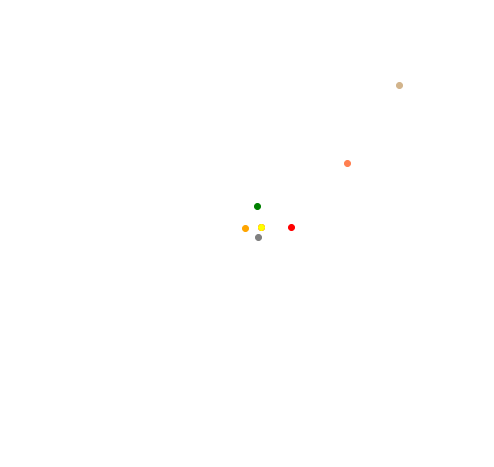

In [40]:
"""Default integration"""
import json
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from datetime import date, datetime, timedelta

t = 3650   # 3650 = 10 years

class Object:
    def __init__(self, name, color, pos, vel):
        self.name = name
        self.pos    = np.array(pos, dtype=np.float)
        self.vel    = np.array(vel, dtype=np.float)
        self.x = []
        self.y = []
        self.z = []
        self.plot = ax.scatter(pos[0], pos[1], color=color)
        self.line, = ax.plot([], [], color=color, linewidth=1.4)
        
class SolarSystem:
    def __init__(self, center):
        self.center = center
        self.bodies = []
        ###self.time = None
        #self.timestamp = ax.text(.03, .94, 'Date: ', color='w', transform=ax.transAxes, fontsize='x-large')
    def add_planet(self, body):
        self.bodies.append(body)
    def evolve(self): # evolve the trajectories
        dt = 1
        #self.time += timedelta(dt)
        plots = []
        lines = []
        for i, b in enumerate(self.bodies):
            
            #new_posarray[i] -= new_posarray[0]   # subtract movement of the sun (experimental)
            
            new_posarray[i] += new_velarray[i]*dt
            acc = gravitational_accel(i,new_posarray,massarray)
            new_velarray[i] += acc*dt
            b.x.append(new_posarray[i][0])
            b.y.append(new_posarray[i][1])
            b.z.append(new_posarray[i][2])
            b.plot.set_offsets(new_posarray[i][:2])
            plots.append(b.plot)
            b.line.set_xdata(b.x)
            b.line.set_ydata(b.y)
            #b.line.set_zdata(b.z)
            lines.append(b.line)
        #if len(b.x) > 10000:
            #raise SystemExit("Stopping after a long run to prevent memory overflow")
        #self.timestamp.set_text('Date: {}'.format(self.time.isoformat()))
        return plots + lines #+ [self.timestamp]

new_posarray = posarray.copy()
new_velarray = velarray.copy()

fig = plt.figure(figsize=[6, 6])
ax = plt.axes([0., 0., 1., 1.], xlim=(-10, 10), ylim=(-10,10))
ax.set_aspect('equal')
ax.axis('off')
ss = SolarSystem(Object("Sun",'red', [0., 0., 0.], [0., 0., 0.]))
body_numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]   # The 1st, 2nd, 3rd, and 4th planet in solar system
colors = ['yellow', 'grey', 'orange','green','red','coral','tan','aqua','blue','maroon']
for i, body_number in enumerate(body_numbers):
    ss.add_planet(Object(body_number, colors[i], posarray[i], velarray[i]))

def animate(i):
    return ss.evolve()
ani = animation.FuncAnimation(fig, animate, repeat=False, frames=t, blit=True, interval=1,)
plt.show()
# ani.save('solar_system_6in_150dpi.mp4', fps=60, dpi=150)

<IPython.core.display.Javascript object>


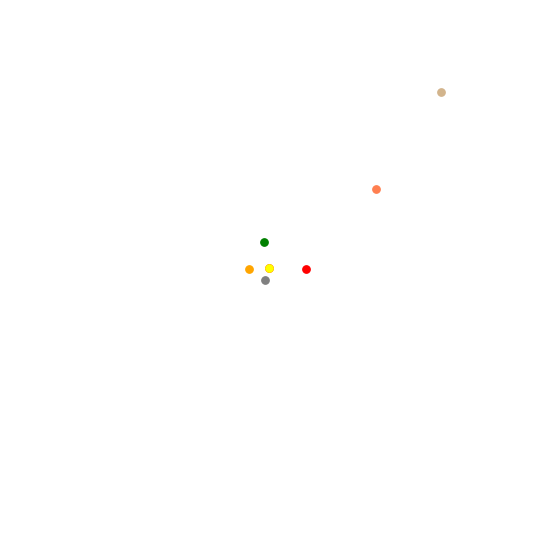

In [16]:
"""Original version used in this notebook"""
import json
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from datetime import date, datetime, timedelta

t = 100000

class Object:
    def __init__(self, name, color, pos, vel):
        self.name = name
        self.pos    = np.array(pos, dtype=np.float)
        self.vel    = np.array(vel, dtype=np.float)
        self.x = []
        self.y = []
        self.z = []
        self.plot = ax.scatter(pos[0], pos[1], color=color)
        self.line, = ax.plot([], [], color=color, linewidth=1.4)
        
class SolarSystem:
    def __init__(self, center):
        self.center = center
        self.bodies = []
        ###self.time = None
        #self.timestamp = ax.text(.03, .94, 'Date: ', color='w', transform=ax.transAxes, fontsize='x-large')
    def add_planet(self, body):
        self.bodies.append(body)
    def evolve(self): # evolve the trajectories
        dt = 1
        #self.time += timedelta(dt)
        plots = []
        lines = []
        for i, b in enumerate(self.bodies):
            b.pos += b.vel * dt
            acc = -2.959e-4 * b.pos / np.sum(b.pos**2)**(1.5)  # in units of AU/day^2
            #acc = gravitational_accel(i,posarray,massarray)
            #print(b.vel)
            b.vel += acc * dt
            b.x.append(b.pos[0])
            b.y.append(b.pos[1])
            b.z.append(b.pos[2])
            b.plot.set_offsets(b.pos[:3])
            plots.append(b.plot)
            b.line.set_xdata(b.x)
            b.line.set_ydata(b.y)
            b.line.set_zdata(b.z)
            lines.append(b.line)
        #if len(b.x) > 10000:
            #raise SystemExit("Stopping after a long run to prevent memory overflow")
        #self.timestamp.set_text('Date: {}'.format(self.time.isoformat()))
        return plots + lines #+ [self.timestamp]

fig = plt.figure(figsize=[6, 6])
ax = plt.axes([0., 0., 1., 1.], xlim=(-10, 10), ylim=(-10,10))
ax.set_aspect('equal')
ax.axis('off')
ss = SolarSystem(Object("Sun",'red', [0., 0., 0.], [0., 0., 0.]))
body_numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]   # The 1st, 2nd, 3rd, and 4th planet in solar system
colors = ['yellow', 'grey', 'orange','green','red','coral','tan','aqua','blue','maroon']
for i, body_number in enumerate(body_numbers):
    ss.add_planet(Object(body_number, colors[i], posarray[i], velarray[i]))

def animate(i):
    return ss.evolve()

ani = animation.FuncAnimation(fig, animate, repeat=False, frames=t, blit=True, interval=1,)
plt.show()
# ani.save('solar_system_6in_150dpi.mp4', fps=60, dpi=150)

In [8]:
print(np.zeros((len(velarray),3)))

[-0.00537432  0.00230443  0.00017335]
[  2.37100442e-03   2.93618369e-03  -2.46106246e-05]
[  2.47581097e-03   1.92104084e-03  -9.67962819e-05]
[ 0.00309143 -0.00136554 -0.00075   ]
[ nan  nan  nan]
[ 0.01895365  0.01447415 -0.00055727]
[ 0.0088848   0.01786735 -0.00026863]
[  1.67823150e-02   1.96580973e-03  -3.03836752e-08]
[ 0.01459346  0.00155302 -0.0003262 ]
[-0.00761171  0.00104348  0.00016613]
[-0.0053758   0.00230117  0.00017346]
[  2.37041716e-03   2.93663696e-03  -2.46101227e-05]
[  2.47561362e-03   1.92130102e-03  -9.67970909e-05]
[ 0.00309151 -0.00136523 -0.00075005]
[ nan  nan  nan]
[ 0.01820286  0.01577384 -0.00038219]
[ 0.00839312  0.01811308 -0.00023689]
[  1.67488434e-02   2.24931511e-03  -3.16100167e-08]
[ 0.01458918  0.00169478 -0.00032313]
[-0.00761272  0.00103219  0.0001662 ]
[-0.00537727  0.00229791  0.00017358]
[  2.36982983e-03   2.93709011e-03  -2.46096199e-05]
[  2.47541624e-03   1.92156118e-03  -9.67978988e-05]
[ 0.0030916  -0.00136493 -0.00075011]
[[ 0.  0. 

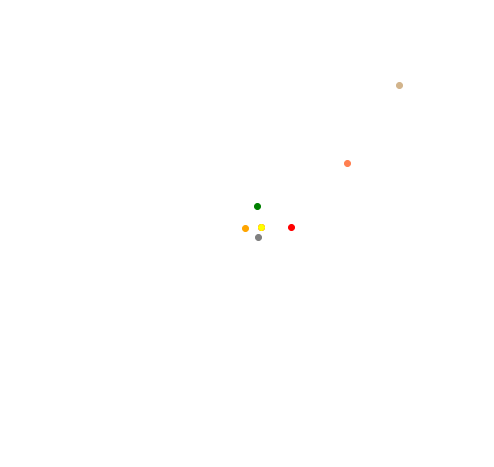

In [55]:
"""Runge-Kutta integration"""
import json
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from datetime import date, datetime, timedelta

t = 3650   # 3650 = 10 years

class Object:
    def __init__(self, name, color, pos, vel):
        self.name = name
        self.pos    = np.array(pos, dtype=np.float)
        self.vel    = np.array(vel, dtype=np.float)
        self.x = []
        self.y = []
        self.z = []
        self.plot = ax.scatter(pos[0], pos[1], color=color)
        self.line, = ax.plot([], [], color=color, linewidth=1.4)
        
class SolarSystem:
    def __init__(self, center):
        self.center = center
        self.bodies = []
        ###self.time = None
        #self.timestamp = ax.text(.03, .94, 'Date: ', color='w', transform=ax.transAxes, fontsize='x-large')
    def add_planet(self, body):
        self.bodies.append(body)
    def evolve(self): # evolve the trajectories
        
        dt = 1
        #self.time += timedelta(dt)
        plots = []
        lines = []
        k1 = new_velarray
        
        k2 = np.zeros((len(k1),3))
        k3 = np.zeros((len(k1),3))
        k4 = np.zeros((len(k1),3))
        
        k2 = new_velarray + RK_k(k1,1,self)*dt/2
        k3 = new_velarray + RK_k(k2,1,self)*dt/2
        k4 = new_velarray + RK_k(k3,0,self)*dt
        
        for i, b in enumerate(self.bodies):
            
            new_posarray[i] = old_posarray[i] + dt*(k1[i] + 2*k2[i] + 2*k3[i] + k4[i])/6
            old_posarray[i] = new_posarray[i]
            
            acc = gravitational_accel(i,new_posarray,massarray)
            new_velarray[i] += acc*dt
            #print(new_posarray[i][0])
            b.x.append(new_posarray[i][0])
            b.y.append(new_posarray[i][1])
            b.z.append(new_posarray[i][2])

            b.plot.set_offsets(new_posarray[i][:2])
            plots.append(b.plot)
            b.line.set_xdata(b.x)
            b.line.set_ydata(b.y)
            lines.append(b.line)
        #if len(b.x) > 10000:
            #raise SystemExit("Stopping after a long run to prevent memory overflow")
        #self.timestamp.set_text('Date: {}'.format(self.time.isoformat()))
        #print(len(b.x))
        return plots + lines #+ [self.timestamp]


new_posarray = posarray.copy()
old_posarray = posarray.copy()
new_velarray = velarray.copy()


fig = plt.figure(figsize=[6, 6])
ax = plt.axes([0., 0., 1., 1.], xlim=(-10, 10), ylim=(-10,10))
ax.set_aspect('equal')
ax.axis('off')
ss = SolarSystem(Object("Sun",'red', [0., 0., 0.], [0., 0., 0.]))
body_numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]   # The 1st, 2nd, 3rd, and 4th planet in solar system
colors = ['yellow', 'grey', 'orange','green','red','coral','tan','aqua','blue','maroon']
for i, body_number in enumerate(body_numbers):
    ss.add_planet(Object(body_number, colors[i], posarray[i], velarray[i]))

def animate(i):
    return ss.evolve()
ani = animation.FuncAnimation(fig, animate, repeat=False, frames=t, blit=True, interval=1,)
plt.show()
# ani.save('solar_system_6in_150dpi.mp4', fps=60, dpi=150)

hey
[[  8.39817995e-09   8.09837035e-09  -2.07785909e-10]
 [ -9.80435376e-02  -4.56788737e-01  -2.83161880e-02]
 [ -7.17035000e-01  -6.30822090e-02   4.05251617e-02]
 [ -2.02934730e-01   9.62467494e-01  -4.04876233e-06]
 [  1.39170413e+00   9.36353048e-03  -3.40147382e-02]
 [  3.99432332e+00   2.94824063e+00  -1.01671858e-01]
 [  6.39997250e+00   6.57582421e+00  -3.68921928e-01]
 [  1.44358740e+01  -1.37303129e+01  -7.42442858e-05]
 [  1.68159160e+01  -2.49890983e+01   1.27078170e-01]
 [ -9.87078931e+00  -2.79610806e+01   5.84938011e+00]]
hey
[[  2.51806769e-08   2.42659792e-08  -6.25007825e-10]
 [ -7.62448499e-02  -4.61259981e-01  -3.06822489e-02]
 [ -7.15386948e-01  -8.33046431e-02   4.01536470e-02]
 [ -2.20047740e-01   9.58860019e-01  -4.01123731e-06]
 [  1.39214662e+00   2.45494711e-02  -3.37074848e-02]
 [  3.98974025e+00   2.95467367e+00  -1.01595897e-01]
 [  6.39567705e+00   6.57971116e+00  -3.68819034e-01]
 [  1.44385514e+01  -1.37276395e+01  -9.89923862e-05]
 [  1.68184948e+01 

hey
[[  4.51753039e-05   4.10099573e-05  -1.34061196e-06]
 [  1.97316643e-01  -4.01011777e-01  -5.08701523e-02]
 [  7.01618046e-01  -1.99024082e-01  -4.32169569e-02]
 [ -9.31021563e-01  -3.96647703e-01   1.69720566e-06]
 [  7.52461604e-01   1.30052024e+00   8.74529085e-03]
 [  3.47933191e+00   3.56517520e+00  -9.26980889e-02]
 [  5.94946017e+00   6.95899341e+00  -3.57701213e-01]
 [  1.47061656e+01  -1.34549889e+01  -2.59839923e-03]
 [  1.70780148e+01  -2.48064616e+01   1.17258555e-01]
 [ -9.56024846e+00  -2.81155203e+01   5.77588702e+00]]
hey
[[  4.60652520e-05   4.18012702e-05  -1.36893919e-06]
 [  2.16413969e-01  -3.87136300e-01  -5.14895245e-02]
 [  7.06484359e-01  -1.79587491e-01  -4.32321780e-02]
 [ -9.24455265e-01  -4.12326190e-01   1.73676814e-06]
 [  7.40923517e-01   1.30866062e+00   9.19940522e-03]
 [  3.47383076e+00   3.57080720e+00  -9.25982685e-02]
 [  5.94492231e+00   6.96261417e+00  -3.57584008e-01]
 [  1.47087873e+01  -1.34522635e+01  -2.62314270e-03]
 [  1.70805749e+01 

 [ -9.24864289e+00  -2.82668303e+01   5.70175101e+00]]
hey
[[  1.82189642e-04   1.71633730e-04  -5.75678254e-06]
 [  3.67971310e-01  -8.10325046e-02  -4.03967544e-02]
 [ -6.33453226e-01   3.26543793e-01   4.10285872e-02]
 [  5.25887644e-01  -8.65512026e-01  -1.70375045e-06]
 [ -5.76381050e-01   1.51885173e+00   4.59778758e-02]
 [  2.87164732e+00   4.09832336e+00  -8.13034930e-02]
 [  5.47028002e+00   7.31751634e+00  -3.44907503e-01]
 [  1.49732999e+01  -1.31716506e+01  -5.14632151e-03]
 [  1.73407279e+01  -2.46191924e+01   1.07329219e-01]
 [ -9.24558279e+00  -2.82682982e+01   5.70102103e+00]]
hey
[[  1.83908756e-04   1.73417478e-04  -5.81081424e-06]
 [  3.67399229e-01  -5.26384202e-02  -3.80247592e-02]
 [ -6.42826554e-01   3.08326260e-01   4.13206466e-02]
 [  5.40208157e-01  -8.56365986e-01  -1.81610087e-06]
 [ -5.88836322e-01   1.51501835e+00   4.62036673e-02]
 [  2.86536779e+00   4.10301498e+00  -8.11823658e-02]
 [  5.46551411e+00   7.32085174e+00  -3.44776220e-01]
 [  1.49758645e+01

[[  3.92314017e-04   4.05844213e-04  -1.21224370e-05]
 [  1.29855741e-01   2.81447296e-01   1.10636691e-02]
 [  5.18638862e-01  -5.20586999e-01  -3.70463574e-02]
 [  7.16632470e-01   6.75035121e-01  -1.64140846e-05]
 [ -1.52769545e+00   6.70095465e-01   5.15744953e-02]
 [  2.19219103e+00   4.52911872e+00  -6.78795959e-02]
 [  4.96852470e+00   7.64584632e+00  -3.30686127e-01]
 [  1.52345018e+01  -1.28830914e+01  -7.69224833e-03]
 [  1.76014452e+01  -2.44290880e+01   9.73875029e-02]
 [ -8.92987037e+00  -2.84178772e+01   5.62550992e+00]]
hey
[[  3.94705084e-04   4.08619831e-04  -1.21954156e-05]
 [  9.79229463e-02   2.92423412e-01   1.48911342e-02]
 [  5.32373277e-01  -5.06209126e-01  -3.76425711e-02]
 [  7.04416543e-01   6.87547890e-01  -1.65455629e-05]
 [ -1.53265895e+00   6.58447427e-01   5.14524207e-02]
 [  2.18530030e+00   4.53276744e+00  -6.77404792e-02]
 [  4.96354888e+00   7.64888086e+00  -3.30541217e-01]
 [  1.52370083e+01  -1.28802646e+01  -7.71695296e-03]
 [  1.76039666e+01  -2.

hey
[[  6.70254077e-04   7.55118180e-04  -2.08105492e-05]
 [ -3.07014260e-01   1.57931452e-01   4.10591567e-02]
 [ -3.71424232e-01   6.04597788e-01   2.97097290e-02]
 [ -8.42301066e-01   5.29173471e-01  -2.33547658e-05]
 [ -1.48893621e+00  -6.10223287e-01   2.37937140e-02]
 [  1.45881323e+00   4.84859884e+00  -5.27887421e-02]
 [  4.44612661e+00   7.94245096e+00  -3.15087514e-01]
 [  1.54896764e+01  -1.25894330e+01  -1.02351702e-02]
 [  1.78601362e+01  -2.42361694e+01   8.74345514e-02]
 [ -8.61315011e+00  -2.85642503e+01   5.54936420e+00]]
hey
[[  6.73183203e-04   7.59190259e-04  -2.09038601e-05]
 [ -3.24651723e-01   1.33159855e-01   4.06542116e-02]
 [ -3.88840533e-01   5.93621478e-01   3.05649952e-02]
 [ -8.51619848e-01   5.14613505e-01  -2.33622265e-05]
 [ -1.48296666e+00  -6.21956841e-01   2.34011072e-02]
 [  1.45148976e+00   4.85113362e+00  -5.26353345e-02]
 [  4.44096027e+00   7.94517041e+00  -3.14929505e-01]
 [  1.54921240e+01  -1.25865574e+01  -1.02598408e-02]
 [  1.78626377e+01 

 [ -8.29854974e+00  -2.87060368e+01   5.47334276e+00]]
hey
[[  9.77886185e-04   1.23515322e-03  -3.07982809e-05]
 [ -3.63943197e-01  -2.24554622e-01   1.50176539e-02]
 [  2.02686128e-01  -7.08216105e-01  -2.13729621e-02]
 [ -3.87979607e-01  -9.40622916e-01  -2.29215914e-05]
 [ -3.97794541e-01  -1.42588745e+00  -2.01221910e-02]
 [  6.90199784e-01   5.05107044e+00  -3.64253693e-02]
 [  3.90514357e+00   8.20593219e+00  -2.98169722e-01]
 [  1.57387313e+01  -1.22907987e+01  -1.27740831e-02]
 [  1.81167703e+01  -2.40404580e+01   7.74715089e-02]
 [ -8.29546085e+00  -2.87074112e+01   5.47259446e+00]]
hey
[[  9.80934337e-04   1.24035092e-03  -3.08999675e-05]
 [ -3.54394872e-01  -2.47131080e-01   1.22967545e-02]
 [  2.21649172e-01  -7.02494769e-01  -2.23892899e-02]
 [ -3.72331061e-01  -9.46960890e-01  -2.29747909e-05]
 [ -3.83685361e-01  -1.42838795e+00  -2.05214750e-02]
 [  6.82626961e-01   5.05245201e+00  -3.62616103e-02]
 [  3.89980727e+00   8.20832366e+00  -2.97999214e-01]
 [  1.57411190e+01

 [ -7.97684139e+00  -2.88473543e+01   5.39521135e+00]]
hey
[[  1.30838918e-03   1.83130693e-03  -4.22803612e-05]
 [ -1.02852696e-01  -4.54153732e-01  -2.77320237e-02]
 [ -2.41133073e-02   7.10827796e-01   1.11182972e-02]
 [  9.76826361e-01  -2.11669799e-01  -4.06260162e-05]
 [  1.00531094e+00  -9.48802738e-01  -4.46286538e-02]
 [ -1.02398217e-01   5.13428518e+00  -1.90317157e-02]
 [  3.34226390e+00   8.43708665e+00  -2.79815656e-01]
 [  1.59839033e+01  -1.19843432e+01  -1.53325614e-02]
 [  1.83737783e+01  -2.38400349e+01   6.74026663e-02]
 [ -7.97374357e+00  -2.88486972e+01   5.39445709e+00]]
hey
[[  1.31168140e-03   1.83765467e-03  -4.23971299e-05]
 [ -8.10706582e-02  -4.58611647e-01  -3.00957115e-02]
 [ -4.46677523e-02   7.09700348e-01   1.22892724e-02]
 [  9.80052469e-01  -1.94734257e-01  -4.08822875e-05]
 [  1.01549185e+00  -9.37387141e-01  -4.46399106e-02]
 [ -1.10037664e-01   5.13449368e+00  -1.88616100e-02]
 [  3.33677792e+00   8.43913534e+00  -2.79633205e-01]
 [  1.59862297e+01

[[  1.64864200e-03   2.55818245e-03  -5.44538868e-05]
 [  2.31752348e-01  -3.67616234e-01  -5.14133351e-02]
 [ -1.25676910e-01  -7.22944630e-01  -2.62424740e-03]
 [ -4.94220154e-02   9.83737926e-01  -6.27888317e-05]
 [  1.32071019e+00   5.30368268e-01  -2.14152816e-02]
 [ -8.92586534e-01   5.09631915e+00  -1.19025335e-03]
 [  2.76499508e+00   8.63205592e+00  -2.60257282e-01]
 [  1.62226542e+01  -1.16730710e+01  -1.78849118e-02]
 [  1.86286277e+01  -2.36368091e+01   5.73258862e-02]
 [ -7.65111781e+00  -2.89866976e+01   5.31570539e+00]]
hey
[[  1.65183808e-03   2.56578385e-03  -5.45707279e-05]
 [  2.49485058e-01  -3.50952048e-01  -5.16799791e-02]
 [ -1.06125825e-01  -7.26252711e-01  -3.79799541e-03]
 [ -6.69019604e-02   9.82789830e-01  -6.28998255e-05]
 [  1.31606070e+00   5.44532960e-01  -2.10045139e-02]
 [ -9.00112700e-01   5.09537518e+00  -1.01790997e-03]
 [  2.75938242e+00   8.63375170e+00  -2.60063632e-01]
 [  1.62249184e+01  -1.16700550e+01  -1.79094206e-02]
 [  1.86310676e+01  -2.

 [ -7.33073787e+00  -2.91201282e+01   5.23711629e+00]]
hey
[[  1.97195922e-03   3.40831191e-03  -6.69978131e-05]
 [  3.55387560e-01   1.61717647e-02  -3.14606896e-02]
 [  3.11376016e-01   6.45111586e-01  -9.15222249e-03]
 [ -9.66424585e-01  -2.84585201e-01  -6.44680223e-05]
 [  2.94907092e-01   1.52672693e+00   2.46417693e-02]
 [ -1.66215966e+00   4.94070270e+00   1.66771927e-02]
 [  2.17577218e+00   8.78987039e+00  -2.39575130e-01]
 [  1.64548961e+01  -1.13571130e+01  -2.04301175e-02]
 [  1.88812878e+01  -2.34308037e+01   4.72423516e-02]
 [ -7.32762334e+00  -2.91214078e+01   5.23635043e+00]]
hey
[[  1.97495390e-03   3.41708569e-03  -6.71223284e-05]
 [  3.47655417e-01   4.53162349e-02  -2.83707524e-02]
 [  2.92681691e-01   6.53543180e-01  -7.95798864e-03]
 [ -9.61689047e-01  -3.00933141e-01  -6.44490921e-05]
 [  2.81762890e-01   1.53050175e+00   2.50436160e-02]
 [ -1.66940307e+00   4.93865328e+00   1.68477884e-02]
 [  2.17005666e+00   8.79120477e+00  -2.39371085e-01]
 [  1.64570974e+01

 [ -7.00642216e+00  -2.92515764e+01   5.15717481e+00]]
hey
[[  2.25890872e-03   4.38031583e-03  -7.95723184e-05]
 [ -1.70522046e-02   3.11814069e-01   2.68074804e-02]
 [ -4.27879900e-01  -5.88392976e-01   1.66431472e-02]
 [  4.42768130e-01  -9.09007399e-01  -7.17846504e-05]
 [ -1.01181041e+00   1.30888165e+00   5.21625394e-02]
 [ -2.39417630e+00   4.67354303e+00   3.41663652e-02]
 [  1.57710736e+00   8.90973539e+00  -2.17855701e-01]
 [  1.66805441e+01  -1.10366014e+01  -2.29671672e-02]
 [  1.91317281e+01  -2.32220419e+01   3.71532469e-02]
 [ -7.00329984e+00  -2.92528243e+01   5.15640330e+00]]
hey
[[  2.26140036e-03   4.39016873e-03  -7.96887292e-05]
 [ -5.07159863e-02   3.09462333e-01   2.97042905e-02]
 [ -4.11771555e-01  -6.00139848e-01   1.55526731e-02]
 [  4.57893863e-01  -9.01302724e-01  -7.19720502e-05]
 [ -1.02221813e+00   1.30144567e+00   5.22622413e-02]
 [ -2.40098124e+00   4.67045822e+00   3.43314393e-02]
 [  1.57131346e+00   8.91070159e+00  -2.17642120e-01]
 [  1.66826815e+01

[[  2.49424068e-03   5.43928680e-03  -9.13838232e-05]
 [ -3.69735775e-01   5.40731548e-02   3.80440034e-02]
 [  5.89273523e-01   4.18585875e-01  -2.83099061e-02]
 [  7.84567650e-01   6.04233899e-01  -9.74448874e-05]
 [ -1.64334017e+00   2.10858365e-01   4.46489408e-02]
 [ -3.06702228e+00   4.30718423e+00   5.07425314e-02]
 [  9.77421238e-01   8.99044227e+00  -1.95413125e-01]
 [  1.68974420e+01  -1.07148145e+01  -2.54707959e-02]
 [  1.93775431e+01  -2.30125941e+01   2.71568279e-02]
 [ -6.68131660e+00  -2.93797278e+01   5.07665220e+00]]
hey
[[  2.49634519e-03   5.45005375e-03  -9.14982274e-05]
 [ -3.78282314e-01   2.72724384e-02   3.66381724e-02]
 [  5.77049186e-01   4.34877065e-01  -2.73816894e-02]
 [  7.73679708e-01   6.17903036e-01  -9.77032148e-05]
 [ -1.64441761e+00   1.98165656e-01   4.44092189e-02]
 [ -3.07325534e+00   4.30316221e+00   5.08986924e-02]
 [  9.71574348e-01   8.99103893e+00  -1.95190997e-01]
 [  1.68995155e+01  -1.07116695e+01  -2.54950558e-02]
 [  1.93799187e+01  -2.

[[  2.67874747e-03   6.59284921e-03  -1.02559382e-04]
 [ -3.34882719e-01  -2.84250675e-01   7.11798522e-03]
 [ -6.65114880e-01  -2.74791293e-01   3.45938987e-02]
 [ -7.70844493e-01   6.28955485e-01  -1.09491533e-04]
 [ -1.19988843e+00  -1.00077868e+00   8.33936843e-03]
 [ -3.66915715e+00   3.85429777e+00   6.60949948e-02]
 [  3.79417487e-01   9.03268600e+00  -1.72367233e-01]
 [  1.71057039e+01  -1.03920075e+01  -2.79403081e-02]
 [  1.96187682e+01  -2.28025612e+01   1.72543560e-02]
 [ -6.36173393e+00  -2.95022102e+01   4.99712442e+00]]
hey
[[  2.68016004e-03   6.60467394e-03  -1.02660439e-04]
 [ -3.21782639e-01  -3.03749727e-01   4.32182808e-03]
 [ -6.57423709e-01  -2.93408561e-01   3.38951750e-02]
 [ -7.81821636e-01   6.15560600e-01  -1.09449248e-04]
 [ -1.19024930e+00  -1.01026378e+00   7.90351619e-03]
 [ -3.67470584e+00   3.84944956e+00   6.62392659e-02]
 [  3.73542623e-01   9.03291367e+00  -1.72137563e-01]
 [  1.71077133e+01  -1.03888228e+01  -2.79644676e-02]
 [  1.96211222e+01  -2.

hey
[[  2.78038800e-03   7.83416418e-03  -1.12303707e-04]
 [ -8.56852775e-02  -4.51403641e-01  -2.95098417e-02]
 [  7.27579983e-01   2.97185358e-02  -4.16478166e-02]
 [ -5.03420913e-01  -8.76096044e-01  -1.02493156e-04]
 [  1.22337110e-01  -1.42441262e+00  -3.30547604e-02]
 [ -4.19629337e+00   3.32278078e+00   8.00951242e-02]
 [ -2.20199548e-01   9.03721303e+00  -1.48600081e-01]
 [  1.73073942e+01  -1.00652050e+01  -3.03991181e-02]
 [  1.98577727e+01  -2.25899455e+01   7.34991821e-03]
 [ -6.04146652e+00  -2.96215174e+01   4.91705897e+00]]
hey
[[  2.78099680e-03   7.84665701e-03  -1.12395274e-04]
 [ -6.36527785e-02  -4.54532252e-01  -3.17885501e-02]
 [  7.26320977e-01   4.98423166e-02  -4.13001550e-02]
 [ -4.88731246e-01  -8.84417511e-01  -1.02487192e-04]
 [  1.36887310e-01  -1.42196433e+00  -3.33612883e-02]
 [ -4.20105785e+00   3.31721988e+00   8.02248014e-02]
 [ -2.26077811e-01   9.03707044e+00  -1.48363826e-01]
 [  1.73093388e+01  -1.00619817e+01  -3.04231680e-02]
 [  1.98601048e+01 

 [ -5.72055130e+00  -2.97376485e+01   4.83646645e+00]]
hey
[[  2.80500961e-03   9.15658524e-03  -1.21177060e-04]
 [  2.28583040e-01  -3.58622448e-01  -5.08873040e-02]
 [ -7.04814388e-01   1.21708259e-01   4.22610855e-02]
 [  9.37887431e-01  -3.49297742e-01  -1.17107536e-04]
 [  1.28731222e+00  -4.90352906e-01  -4.21433727e-02]
 [ -4.64305237e+00   2.71855134e+00   9.25980537e-02]
 [ -8.24776811e-01   9.00347317e+00  -1.23969037e-01]
 [  1.75043211e+01  -9.73127552e+00  -3.28702248e-02]
 [  2.00968390e+01  -2.23726481e+01  -2.65247500e-03]
 [ -5.71740199e+00  -2.97387713e+01   4.83567375e+00]]
hey
[[  2.80481894e-03   9.16976785e-03  -1.21253509e-04]
 [  2.46469062e-01  -3.41700633e-01  -5.11475767e-02]
 [ -7.08101250e-01   1.01605639e-01   4.21755924e-02]
 [  9.43596708e-01  -3.33076047e-01  -1.17373850e-04]
 [  1.29292580e+00  -4.76073092e-01  -4.19824634e-02]
 [ -4.64694195e+00   2.71239538e+00   9.27106198e-02]
 [ -8.30633526e-01   9.00295723e+00  -1.23727135e-01]
 [  1.75061996e+01

[[  2.74127039e-03   1.05269812e-02  -1.27970507e-04]
 [  3.59430366e-01  -2.69654094e-02  -3.59258241e-02]
 [  6.40183151e-01  -3.49356384e-01  -4.18424739e-02]
 [  1.39535057e-01   9.82613471e-01  -1.39776553e-04]
 [  1.10225451e+00   9.67940795e-01  -7.08021717e-03]
 [ -4.99326739e+00   2.06633543e+00   1.03139495e-01]
 [ -1.42004797e+00   8.93226861e+00  -9.90554427e-02]
 [  1.76925920e+01  -9.39683447e+00  -3.53047118e-02]
 [  2.03312971e+01  -2.21549123e+01  -1.25574708e-02]
 [ -5.39586994e+00  -2.98516947e+01   4.75455975e+00]]
hey
[[  2.74022787e-03   1.05406525e-02  -1.28030150e-04]
 [  3.55764393e-01   2.57880043e-03  -3.31770567e-02]
 [  6.49481903e-01  -3.31682454e-01  -4.21377642e-02]
 [  1.22166075e-01   9.84963968e-01  -1.39861517e-04]
 [  1.09362182e+00   9.79655641e-01  -6.62305663e-03]
 [ -4.99622653e+00   2.05972039e+00   1.03233143e-01]
 [ -1.42585872e+00   8.93138531e+00  -9.88089690e-02]
 [  1.76944043e+01  -9.39353758e+00  -3.53285140e-02]
 [  2.03335844e+01  -2.

 [ -5.07376387e+00  -2.99614416e+01   4.67294001e+00]]
hey
[[  2.58899250e-03   1.19643188e-02  -1.33411093e-04]
 [  6.79555505e-02   3.11777542e-01   1.83608393e-02]
 [ -5.29207989e-01   4.83513252e-01   3.70107737e-02]
 [ -1.00023617e+00  -7.89335735e-02  -1.31621289e-04]
 [ -1.29767146e-01   1.59619074e+00   3.63112425e-02]
 [ -5.24809319e+00   1.36709528e+00   1.11741297e-01]
 [ -2.01514459e+00   8.82253917e+00  -7.34776665e-02]
 [  1.78758311e+01  -9.05545819e+00  -3.77493733e-02]
 [  2.05657166e+01  -2.19324930e+01  -2.25581379e-02]
 [ -5.07060325e+00  -2.99625018e+01   4.67213735e+00]]
hey
[[  2.58700299e-03   1.19785515e-02  -1.33454450e-04]
 [  3.45392013e-02   3.17570597e-01   2.18994680e-02]
 [ -5.42771339e-01   4.68090440e-01   3.75823333e-02]
 [ -9.98850912e-01  -9.59481648e-02  -1.31449393e-04]
 [ -1.43103318e-01   1.59616620e+00   3.66379736e-02]
 [ -5.25006628e+00   1.36015273e+00   1.11814237e-01]
 [ -2.02088433e+00   8.82128908e+00  -7.32276270e-02]
 [  1.78775760e+01

hey
[[  2.32725467e-03   1.34281949e-02  -1.36460062e-04]
 [ -3.23987214e-01   1.59871372e-01   4.17744602e-02]
 [  3.69306323e-01  -6.25350643e-01  -3.00557897e-02]
 [  2.24075791e-01  -9.78781012e-01  -1.23183625e-04]
 [ -1.29182708e+00   1.06088493e+00   5.36036241e-02]
 [ -5.39877003e+00   6.48343569e-01   1.18093344e-01]
 [ -2.59603876e+00   8.67692926e+00  -4.78396167e-02]
 [  1.80504163e+01  -8.71390862e+00  -4.01558180e-02]
 [  2.07955185e+01  -2.17097335e+01  -3.24591556e-02]
 [ -4.74795450e+00  -3.00690419e+01   4.59001770e+00]]
hey
[[  2.32415693e-03   1.34425922e-02  -1.36479077e-04]
 [ -3.40251936e-01   1.35325495e-01   4.12603664e-02]
 [  3.86284725e-01  -6.15099057e-01  -3.08959255e-02]
 [  2.40520143e-01  -9.74782115e-01  -1.23262616e-04]
 [ -1.29998899e+00   1.05117562e+00   5.36003041e-02]
 [ -5.39973828e+00   6.41214000e-01   1.18144573e-01]
 [ -2.60168424e+00   8.67532187e+00  -4.75871007e-02]
 [  1.80520939e+01  -8.71054335e+00  -4.01793362e-02]
 [  2.07977598e+01 

[[  1.96891472e-03   1.49011665e-02  -1.37669130e-04]
 [ -3.80940177e-01  -1.89198473e-01   1.83291151e-02]
 [ -1.68171622e-01   7.03178501e-01   1.90979604e-02]
 [  9.14954827e-01   3.93079587e-01  -1.43718841e-04]
 [ -1.63154455e+00  -1.49082112e-01   3.65562720e-02]
 [ -5.44625135e+00  -8.25446617e-02   1.22186372e-01]
 [ -3.16613834e+00   8.49524189e+00  -2.20022933e-02]
 [  1.82180989e+01  -8.36902200e+00  -4.25469391e-02]
 [  2.10229631e+01  -2.14845111e+01  -4.23565028e-02]
 [ -4.42480479e+00  -3.01724076e+01   4.50741369e+00]]
hey
[[  1.96497199e-03   1.49157090e-02  -1.37671376e-04]
 [ -3.72803389e-01  -2.11994197e-01   1.57184960e-02]
 [ -1.88094489e-01   6.97936143e-01   2.01757353e-02]
 [  9.07916494e-01   4.09022888e-01  -1.43937874e-04]
 [ -1.62949660e+00  -1.61797272e-01   3.62391360e-02]
 [ -5.44620371e+00  -8.97238437e-02   1.22215073e-01]
 [ -3.17166630e+00   8.49328476e+00  -2.17483575e-02]
 [  1.82197085e+01  -8.36562468e+00  -4.25703026e-02]
 [  2.10251812e+01  -2.

hey
[[  1.50823774e-03   1.64063884e-02  -1.36475387e-04]
 [ -1.57269656e-01  -4.23942093e-01  -2.15397374e-02]
 [ -5.73621303e-03  -7.20907853e-01  -9.80486807e-03]
 [ -5.98842464e-01   8.02330054e-01  -1.47351587e-04]
 [ -8.75669597e-01  -1.23777613e+00  -4.86621246e-03]
 [ -5.38919908e+00  -8.18674504e-01   1.23961818e-01]
 [ -3.72849214e+00   8.27603597e+00   4.18070402e-03]
 [  1.83803612e+01  -8.01750432e+00  -4.49450338e-02]
 [  2.12502188e+01  -2.12546066e+01  -5.23460134e-02]
 [ -4.09801531e+00  -3.02735674e+01   4.42351915e+00]]
hey
[[  1.50320417e-03   1.64210077e-02  -1.36450079e-04]
 [ -1.36209918e-01  -4.30981157e-01  -2.40491532e-02]
 [  1.40659665e-02  -7.20900266e-01  -1.09481811e-02]
 [ -6.12737492e-01   7.91873589e-01  -1.47171041e-04]
 [ -8.63565435e-01  -1.24453648e+00  -5.30562595e-03]
 [ -5.38813138e+00  -8.25765187e-01   1.23967324e-01]
 [ -3.73387852e+00   8.27373504e+00   4.43500005e-03]
 [  1.83819016e+01  -8.01407598e+00  -4.49682322e-02]
 [  2.12524132e+01 

 [ -3.77396763e+00  -3.03705593e+01   4.33997381e+00]]
hey
[[  9.39425775e-04   1.79046464e-02  -1.33071663e-04]
 [  1.63969062e-01  -3.90311654e-01  -4.84446870e-02]
 [  2.12462262e-01   6.96963713e-01  -3.05200294e-03]
 [ -6.78881121e-01  -7.38844732e-01  -1.21212557e-04]
 [  5.56907602e-01  -1.27373422e+00  -4.08548810e-02]
 [ -5.22808962e+00  -1.53867936e+00   1.23341715e-01]
 [ -4.27512527e+00   8.02196653e+00   3.03460200e-02]
 [  1.85354670e+01  -7.66285946e+00  -4.73256593e-02]
 [  2.14750169e+01  -2.10222419e+01  -6.23294768e-02]
 [ -3.77078869e+00  -3.03714945e+01   4.33915249e+00]]
hey
[[  9.33414139e-04   1.79191241e-02  -1.33030110e-04]
 [  1.84214512e-01  -3.77239302e-01  -4.92363727e-02]
 [  1.92704848e-01   7.02612779e-01  -1.83485654e-03]
 [ -6.66304331e-01  -7.50128581e-01  -1.21003960e-04]
 [  5.70333197e-01  -1.26691913e+00  -4.10423097e-02]
 [ -5.22602444e+00  -1.54554462e+00   1.23323964e-01]
 [ -4.28034791e+00   8.01933280e+00   3.05996035e-02]
 [  1.85369376e+01

 [ -3.44952691e+00  -3.04643840e+01   4.25597611e+00]]
hey
[[  2.74111733e-04   1.93705456e-02  -1.27478927e-04]
 [  3.50814564e-01  -9.72582330e-02  -4.18254126e-02]
 [ -3.79041806e-01  -6.08350783e-01   1.31783471e-02]
 [  8.29766267e-01  -5.49391071e-01  -1.19153557e-04]
 [  1.38804649e+00  -3.74028753e-02  -3.54094845e-02]
 [ -4.96910354e+00  -2.22212834e+00   1.20379625e-01]
 [ -4.79876357e+00   7.73719687e+00   5.61318817e-02]
 [  1.86819599e+01  -7.30871326e+00  -4.96650561e-02]
 [  2.16951844e+01  -2.07897343e+01  -7.22089168e-02]
 [ -3.44634429e+00  -3.04652882e+01   4.25515040e+00]]
hey
[[  2.67072036e-04   1.93847334e-02  -1.27410129e-04]
 [  3.53269704e-01  -6.84067949e-02  -3.96953650e-02]
 [ -3.62021040e-01  -6.18659082e-01   1.20543750e-02]
 [  8.39056571e-01  -5.35012755e-01  -1.19312442e-04]
 [  1.38914791e+00  -2.22081437e-02  -3.51185706e-02]
 [ -4.96608894e+00  -2.22863920e+00   1.20339157e-01]
 [ -4.80380317e+00   7.73424593e+00   5.63837141e-02]
 [  1.86833609e+01

 [ -3.12472854e+00  -3.05550450e+01   4.17153664e+00]]
hey
[[ -4.83918392e-04   2.07950393e-02  -1.19511426e-04]
 [  1.74496743e-01   2.75796669e-01   4.65535273e-03]
 [  5.59951201e-01   4.67778599e-01  -2.63518260e-02]
 [  3.68438955e-01   9.30370200e-01  -1.34120264e-04]
 [  8.01000851e-01   1.28457835e+00   6.67096899e-03]
 [ -4.61586572e+00  -2.86304589e+00   1.15131850e-01]
 [ -5.30272573e+00   7.42074995e+00   8.16873317e-02]
 [  1.88213288e+01  -6.95177395e+00  -5.19855393e-02]
 [  2.19128899e+01  -2.05548652e+01  -8.20801666e-02]
 [ -3.12154259e+00  -3.05559182e+01   4.17070666e+00]]
hey
[[ -4.91708008e-04   2.08088156e-02  -1.19426301e-04]
 [  1.44962311e-01   2.92191915e-01   8.70347519e-03]
 [  5.46758974e-01   4.83335739e-01  -2.53781011e-02]
 [  3.52120558e-01   9.36800683e-01  -1.34129912e-04]
 [  7.89745779e-01   1.29322108e+00   7.12816120e-03]
 [ -4.61195556e+00  -2.86907695e+00   1.15069350e-01]
 [ -5.30756256e+00   7.41749546e+00   8.19363907e-02]
 [  1.88226597e+01

[[ -1.32321635e-03   2.21869549e-02  -1.09602380e-04]
 [ -2.53763093e-01   2.51385025e-01   4.17821453e-02]
 [ -6.52456905e-01  -2.98125665e-01   3.30887517e-02]
 [ -9.90694275e-01   1.82991569e-01  -1.10577161e-04]
 [ -5.11094979e-01   1.55932226e+00   4.46207777e-02]
 [ -4.17464460e+00  -3.44896242e+00   1.07686922e-01]
 [ -5.78505650e+00   7.07408499e+00   1.06909223e-01]
 [  1.89535247e+01  -6.59217889e+00  -5.42862325e-02]
 [  2.21281080e+01  -2.03176607e+01  -9.19421022e-02]
 [ -2.79641875e+00  -3.06433884e+01   4.08583186e+00]]
hey
[[ -1.33194435e-03   2.22004058e-02  -1.09491445e-04]
 [ -2.77335605e-01   2.31611524e-01   4.23281801e-02]
 [ -6.43711956e-01  -3.16234992e-01   3.23356538e-02]
 [ -9.93627680e-01   1.66092598e-01  -1.10169815e-04]
 [ -5.23764098e-01   1.55606197e+00   4.48633058e-02]
 [ -4.16990803e+00  -3.45439488e+00   1.07603444e-01]
 [ -5.78967197e+00   7.07054189e+00   1.07154510e-01]
 [  1.89547851e+01  -6.58864076e+00  -5.43086875e-02]
 [  2.21302056e+01  -2.

[[ -2.25884722e-03   2.35224337e-02  -9.72418302e-05]
 [ -4.08341111e-01  -8.37886776e-02   2.84017108e-02]
 [  7.19164810e-01   8.75045336e-02  -4.08600851e-02]
 [ -2.79283575e-02  -9.94610669e-01  -7.90579170e-05]
 [ -1.49687898e+00   7.65588748e-01   5.21673838e-02]
 [ -3.65324959e+00  -3.96815816e+00   9.81709686e-02]
 [ -6.24392229e+00   6.69878546e+00   1.31697075e-01]
 [  1.90785009e+01  -6.23006614e+00  -5.65662665e-02]
 [  2.23408135e+01  -2.00781470e+01  -1.01793600e-01]
 [ -2.47100768e+00  -3.07277035e+01   4.00053659e+00]]
hey
[[ -2.26839034e-03   2.35351451e-02  -9.71129927e-05]
 [ -4.06062057e-01  -1.08771414e-01   2.61497362e-02]
 [  7.16721314e-01   1.07544985e-01  -4.04454302e-02]
 [ -1.10463817e-02  -9.94797060e-01  -7.89461124e-05]
 [ -1.50246289e+00   7.54232258e-01   5.20662303e-02]
 [ -3.64777068e+00  -3.97288138e+00   9.80679350e-02]
 [ -6.24829906e+00   6.69496985e+00   1.31937619e-01]
 [  1.90796903e+01  -6.22650402e+00  -5.65885147e-02]
 [  2.23428864e+01  -2.

[[ -3.26264950e-03   2.47853510e-02  -8.32826997e-05]
 [ -2.65013513e-01  -3.59863552e-01  -7.48787648e-03]
 [ -7.14567354e-01   1.15077256e-01   4.22064817e-02]
 [  9.80161820e-01   1.57153042e-01  -8.67120234e-05]
 [ -1.53346428e+00  -4.99169537e-01   2.65287730e-02]
 [ -3.06099097e+00  -4.40982806e+00   8.67474971e-02]
 [ -6.67761912e+00   6.29654726e+00   1.55953594e-01]
 [  1.91962133e+01  -5.86557451e+00  -5.88247794e-02]
 [  2.25509816e+01  -1.98363505e+01  -1.11633537e-01]
 [ -2.14534403e+00  -3.08088684e+01   3.91483142e+00]]
hey
[[ -3.27282112e-03   2.47974049e-02  -8.31339353e-05]
 [ -2.46919104e-01  -3.72962728e-01  -1.02203341e-02]
 [ -7.17236786e-01   9.48952485e-02   4.20837905e-02]
 [  9.77397057e-01   1.74287096e-01  -8.68697255e-05]
 [ -1.52828649e+00  -5.11189675e-01   2.61493736e-02]
 [ -3.05486826e+00  -4.41374120e+00   8.66266949e-02]
 [ -6.68174115e+00   6.29247628e+00   1.56188459e-01]
 [  1.91973312e+01  -5.86198975e+00  -5.88468123e-02]
 [  2.25530294e+01  -1.

 [ -1.82265804e+00  -3.08861390e+01   3.82957295e+00]]
hey
[[ -4.33118220e-03   2.59742098e-02  -6.71000959e-05]
 [  2.29855308e-02  -4.29083167e-01  -3.97513468e-02]
 [  6.43188926e-01  -3.14624011e-01  -4.21005527e-02]
 [ -3.64400278e-01   9.43147714e-01  -8.35943066e-05]
 [ -5.19335011e-01  -1.37547266e+00  -1.67781466e-02]
 [ -2.40862901e+00  -4.76426127e+00   7.36170034e-02]
 [ -7.08457921e+00   5.86916649e+00   1.79585147e-01]
 [  1.93066199e+01  -5.49884345e+00  -6.10609169e-02]
 [  2.27585874e+01  -1.95922981e+01  -1.21460790e-01]
 [ -1.81946217e+00  -3.08868887e+01   3.82872688e+00]]
hey
[[ -4.34192686e-03   2.59854437e-02  -6.69341919e-05]
 [  4.55376159e-02  -4.24371441e-01  -4.14377201e-02]
 [  6.51945827e-01  -2.96670522e-01  -4.23609145e-02]
 [ -3.80679809e-01   9.36822560e-01  -8.32982884e-05]
 [ -5.05579846e-01  -1.37903089e+00  -1.71909084e-02]
 [ -2.40197496e+00  -4.76727519e+00   7.34805791e-02]
 [ -7.08843182e+00   5.86485820e+00   1.79813434e-01]
 [  1.93076660e+01

hey
[[ -5.44960147e-03   2.70814253e-02  -4.97165430e-05]
 [  2.89004506e-01  -2.39491400e-01  -4.88498736e-02]
 [ -5.38750254e-01   4.97005321e-01   3.71610186e-02]
 [ -8.65016550e-01  -5.11328136e-01  -3.89390609e-05]
 [  8.86694105e-01  -1.03554157e+00  -4.42255346e-02]
 [ -1.70830508e+00  -5.02303742e+00   5.90162444e-02]
 [ -7.46337627e+00   5.41852691e+00   2.02502190e-01]
 [  1.94096815e+01  -5.13001307e+00  -6.32738327e-02]
 [  2.29636067e+01  -1.93460168e+01  -1.31274238e-01]
 [ -1.49339621e+00  -3.09617703e+01   3.74223351e+00]]
hey
[[ -5.46082708e-03   2.70918883e-02  -4.95386690e-05]
 [  3.01812644e-01  -2.15781141e-01  -4.80898643e-02]
 [ -5.52276741e-01   4.81540375e-01   3.77294965e-02]
 [ -8.56083836e-01  -5.25728965e-01  -3.85033966e-05]
 [  8.97960117e-01  -1.02527897e+00  -4.42875564e-02]
 [ -1.70124527e+00  -5.02507665e+00   5.88666952e-02]
 [ -7.46694619e+00   5.41400018e+00   2.02723044e-01]
 [  1.94106554e+01  -5.12638716e+00  -6.32954103e-02]
 [  2.29656039e+01 

 [ -1.16717994e+00  -3.10335198e+01   3.65536179e+00]]
hey
[[ -6.63138935e-03   2.81070159e-02  -3.04356481e-05]
 [  2.75596597e-01   1.78371447e-01  -1.36531272e-02]
 [  3.78823634e-01  -5.99481914e-01  -3.08651310e-02]
 [  6.46656707e-01  -7.42655108e-01  -1.66356468e-05]
 [  1.35552452e+00   3.91300431e-01  -2.58785788e-02]
 [ -9.66118539e-01  -5.18024400e+00   4.30571491e-02]
 [ -7.81600482e+00   4.94186166e+00   2.24832259e-01]
 [  1.95062623e+01  -4.75557967e+00  -6.54840263e-02]
 [  2.31679868e+01  -1.90950870e+01  -1.41168747e-01]
 [ -1.16398111e+00  -3.10342078e+01   3.65450827e+00]]
hey
[[ -6.64303289e-03   2.81163965e-02  -3.02426568e-05]
 [  2.55848785e-01   2.04707588e-01  -9.69096240e-03]
 [  3.95482970e-01  -5.88727171e-01  -3.16800770e-02]
 [  6.59364544e-01  -7.31319682e-01  -1.66676678e-05]
 [  1.35244816e+00   4.06004901e-01  -2.54952378e-02]
 [ -9.58788673e-01  -5.18123853e+00   4.28972210e-02]
 [ -7.81927729e+00   4.93713418e+00   2.25044783e-01]
 [  1.95071629e+01

 [ -8.34447272e-01  -3.11034587e+01   3.56640802e+00]]
hey
[[ -7.84399880e-03   2.90303324e-02  -1.01316599e-05]
 [ -1.92102282e-01   3.04145420e-01   3.93749721e-02]
 [ -2.39306500e-01   6.99158519e-01   2.25210993e-02]
 [  5.71609741e-01   8.22455890e-01  -2.83372487e-05]
 [  4.32357039e-01   1.50090500e+00   2.00139565e-02]
 [ -1.96290210e-01  -5.22743330e+00   2.60228960e-02]
 [ -8.14040835e+00   4.44065048e+00   2.46467773e-01]
 [  1.95961069e+01  -4.37563270e+00  -6.76899163e-02]
 [  2.33716252e+01  -1.88394721e+01  -1.51142704e-01]
 [ -8.31247445e-01  -3.11041155e+01   3.56555088e+00]]
hey
[[ -7.85566609e-03   2.90387690e-02  -9.93339734e-06]
 [ -2.20133933e-01   2.89570711e-01   4.07550267e-02]
 [ -2.58694608e-01   6.92169945e-01   2.35438226e-02]
 [  5.57303177e-01   8.32579155e-01  -2.83223352e-05]
 [  4.19524891e-01   1.50604832e+00   2.04366218e-02]
 [ -1.88841043e-01  -5.22733028e+00   2.58557435e-02]
 [ -8.14336976e+00   4.43574107e+00   2.46671100e-01]
 [  1.95969332e+01

[[ -9.05525545e-03   2.98540110e-02   1.10167327e-05]
 [ -4.20134334e-01  -2.73889095e-02   3.30570700e-02]
 [  4.47821892e-02  -7.05731273e-01  -1.31646044e-02]
 [ -9.35952433e-01   4.00436560e-01   5.02711561e-06]
 [ -8.89483578e-01   1.41870800e+00   5.07313768e-02]
 [  5.70206720e-01  -5.16039382e+00   8.58918406e-03]
 [ -8.42933072e+00   3.92668278e+00   2.66914700e-01]
 [  1.96774540e+01  -3.99762606e+00  -6.98482303e-02]
 [  2.35705812e+01  -1.85841166e+01  -1.61003142e-01]
 [ -5.01628430e-01  -3.11701568e+01   3.47708288e+00]]
hey
[[ -9.06709273e-03   2.98615001e-02   1.12272790e-05]
 [ -4.20995817e-01  -5.27887477e-02   3.10595002e-02]
 [  6.45019306e-02  -7.04051535e-01  -1.42802941e-02]
 [ -9.42524335e-01   3.84507218e-01   5.59071248e-06]
 [ -9.00681545e-01   1.41236133e+00   5.08731952e-02]
 [  5.77613321e-01  -5.15918275e+00   8.41838580e-03]
 [ -8.43197499e+00   3.92161422e+00   2.67108189e-01]
 [  1.96782065e+01  -3.99394822e+00  -6.98690534e-02]
 [  2.35724995e+01  -1.

 [ -1.68758324e-01  -3.12336225e+01   3.38739740e+00]]
hey
[[ -1.02933836e-02   3.05820449e-02   3.29660002e-05]
 [ -2.59660842e-01  -3.64830114e-01  -9.38877851e-03]
 [  9.89514955e-02   7.32429135e-01   3.33480210e-03]
 [ -1.99709036e-01  -9.70721071e-01   5.49709803e-05]
 [ -1.63868812e+00   3.65850763e-01   4.70497276e-02]
 [  1.33828530e+00  -4.97449949e+00  -9.37320609e-03]
 [ -8.68982760e+00   3.38698950e+00   2.86679618e-01]
 [  1.97525295e+01  -3.61067710e+00  -7.20205780e-02]
 [  2.37705851e+01  -1.83215810e+01  -1.71035804e-01]
 [ -1.65557513e-01  -3.12342170e+01   3.38653332e+00]]
hey
[[ -1.03050862e-02   3.05884538e-02   3.31740293e-05]
 [ -2.40902522e-01  -3.76749614e-01  -1.20853247e-02]
 [  7.85543294e-02   7.35152453e-01   4.54871961e-03]
 [ -1.83101104e-01  -9.73679624e-01   5.52103116e-05]
 [ -1.64087023e+00   3.53328238e-01   4.68407452e-02]
 [  1.34547763e+00  -4.97216161e+00  -9.54388540e-03]
 [ -8.69214085e+00   3.38178055e+00   2.86862390e-01]
 [  1.97532063e+01

hey
[[ -1.15002509e-02   3.11965207e-02   5.48598102e-05]
 [  7.84967030e-02  -4.02823773e-01  -4.36626616e-02]
 [ -2.64830525e-01  -6.59164392e-01   5.22572663e-03]
 [  9.83134510e-01   2.97591304e-02   5.25863853e-05]
 [ -1.29032023e+00  -8.94599416e-01   1.20651034e-02]
 [  2.06795136e+00  -4.67500914e+00  -2.69473715e-02]
 [ -8.91325006e+00   2.83904048e+00   3.05114091e-01]
 [  1.98190470e+01  -3.22597071e+00  -7.41436411e-02]
 [  2.39658577e+01  -1.80593645e+01  -1.80952582e-01]
 [  1.67329262e-01  -3.12944284e+01   3.29649519e+00]]
hey
[[ -1.15117275e-02   3.12018840e-02   5.50728384e-05]
 [  1.00552465e-01  -3.93727228e-01  -4.49446615e-02]
 [ -2.46182682e-01  -6.65958816e-01   4.05596820e-03]
 [  9.82687533e-01   4.70607460e-02   5.24213256e-05]
 [ -1.28147405e+00  -9.04704079e-01   1.16359532e-02]
 [  2.07475872e+00  -4.67158426e+00  -2.71139466e-02]
 [ -8.91522929e+00   2.83371447e+00   3.05285620e-01]
 [  1.98196486e+01  -3.22226513e+00  -7.41639142e-02]
 [  2.39677216e+01 

[[ -1.26440474e-02   3.16930722e-02   7.61524549e-05]
 [  3.12828928e-01  -1.53046948e-01  -4.48831863e-02]
 [  4.45044091e-01   5.80473254e-01  -1.88265782e-02]
 [ -2.43146112e-01   9.88213648e-01   5.58785201e-05]
 [ -1.40917332e-02  -1.41538623e+00  -3.02066709e-02]
 [  2.73625294e+00  -4.27403604e+00  -4.35693879e-02]
 [ -9.09839428e+00   2.29088634e+00   3.22029907e-01]
 [  1.98766779e+01  -2.84741489e+00  -7.61974212e-02]
 [  2.41546194e+01  -1.78001115e+01  -1.90657852e-01]
 [  4.93797172e-01  -3.13503602e+01   3.20785991e+00]]
hey
[[ -1.26549629e-02   3.16975019e-02   7.63552160e-05]
 [  3.20629613e-01  -1.25535838e-01  -4.33525064e-02]
 [  4.28965823e-01   5.93121175e-01  -1.77260089e-02]
 [ -2.60157268e-01   9.84131508e-01   5.62140494e-05]
 [  5.00256751e-04  -1.41412610e+00  -3.05387851e-02]
 [  2.74251728e+00  -4.26960016e+00  -4.37280067e-02]
 [ -9.10004145e+00   2.28546683e+00   3.22189860e-01]
 [  1.98772055e+01  -2.84369792e+00  -7.62174142e-02]
 [  2.41564565e+01  -1.

 [  8.20215818e-01  -3.14032101e+01   3.11890952e+00]]
hey
[[ -1.37441833e-02   3.21127250e-02   9.68293615e-05]
 [  1.89006259e-01   2.65444752e-01   5.55420154e-04]
 [ -5.80378957e-01  -4.26637386e-01   2.65172408e-02]
 [ -9.27258828e-01  -4.05141247e-01   1.10027311e-04]
 [  1.21868736e+00  -5.83780193e-01  -4.30719940e-02]
 [  3.34669645e+00  -3.76847790e+00  -5.93306654e-02]
 [ -9.25081612e+00   1.72876974e+00   3.37887729e-01]
 [  1.99272060e+01  -2.46404113e+00  -7.82419426e-02]
 [  2.43424398e+01  -1.75362570e+01  -2.00436231e-01]
 [  8.23415651e-01  -3.14037130e+01   3.11803593e+00]]
hey
[[ -1.37546483e-02   3.21163814e-02   9.70284828e-05]
 [  1.61597657e-01   2.85191616e-01   4.68273791e-03]
 [ -5.67875842e-01  -4.42276423e-01   2.55810656e-02]
 [ -9.20022295e-01  -4.20500311e-01   1.10584777e-04]
 [  1.22547645e+00  -5.70029516e-01  -4.29507332e-02]
 [  3.35225252e+00  -3.76310426e+00  -5.94773258e-02]
 [ -9.25212492e+00   1.72327723e+00   3.38035498e-01]
 [  1.99276587e+01

 [  1.14975236e+00  -3.14534606e+01   3.02877773e+00]]
hey
[[ -1.47886968e-02   3.24399504e-02   1.16767347e-04]
 [ -2.64537774e-01   2.73520874e-01   4.27303300e-02]
 [  6.64100588e-01   2.74728012e-01  -3.57458209e-02]
 [  5.47791280e-01  -8.08886401e-01   1.36012408e-04]
 [  1.14495631e+00   9.01284964e-01  -1.01572743e-02]
 [  3.87646155e+00  -3.17177242e+00  -7.36647232e-02]
 [ -9.36828825e+00   1.16022632e+00   3.52467614e-01]
 [  1.99700083e+01  -2.07970305e+00  -8.02561366e-02]
 [  2.45274320e+01  -1.72703623e+01  -2.10191323e-01]
 [  1.15295123e+00  -3.14539332e+01   3.02790117e+00]]
hey
[[ -1.47984075e-02   3.24426764e-02   1.16951608e-04]
 [ -2.88491634e-01   2.55011560e-01   4.34151884e-02]
 [  6.56669546e-01   2.93594061e-01  -3.50590345e-02]
 [  5.61692147e-01  -7.99107712e-01   1.35915511e-04]
 [  1.13711091e+00   9.13636619e-01  -9.70592083e-03]
 [  3.88116028e+00  -3.16557234e+00  -7.37956270e-02]
 [ -9.36925700e+00   1.15468220e+00   3.52602759e-01]
 [  1.99703859e+01

 [  1.48237158e+00  -3.15010314e+01   2.93746614e+00]]
hey
[[ -1.57500125e-02   3.26923500e-02   1.35194900e-04]
 [ -4.29488196e-01  -9.91143890e-02   2.73309109e-02]
 [ -7.24755480e-01  -1.01442069e-01   3.92165515e-02]
 [  6.55325623e-01   7.51523723e-01   1.14901027e-04]
 [ -6.32090252e-02   1.61439743e+00   3.44424802e-02]
 [  4.31473602e+00  -2.48986495e+00  -8.63049389e-02]
 [ -9.45133661e+00   5.81875376e-01   3.65849354e-01]
 [  2.00053688e+01  -1.69080623e+00  -8.22583197e-02]
 [  2.47113280e+01  -1.69998470e+01  -2.20016338e-01]
 [  1.48556917e+00  -3.15014733e+01   2.93658669e+00]]
hey
[[ -1.57588107e-02   3.26945127e-02   1.35367606e-04]
 [ -4.25605344e-01  -1.22999082e-01   2.50223883e-02]
 [ -7.21143013e-01  -1.21353057e-01   3.87350514e-02]
 [  6.42327117e-01   7.63246425e-01   1.14811714e-04]
 [ -7.65979137e-02   1.61510368e+00   3.47859678e-02]
 [  4.31843544e+00  -2.48297032e+00  -8.64163617e-02]
 [ -9.45196170e+00   5.76300644e-01   3.65971364e-01]
 [  2.00056705e+01

/Software/users/modules/7/software/anaconda3/4.2.0/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


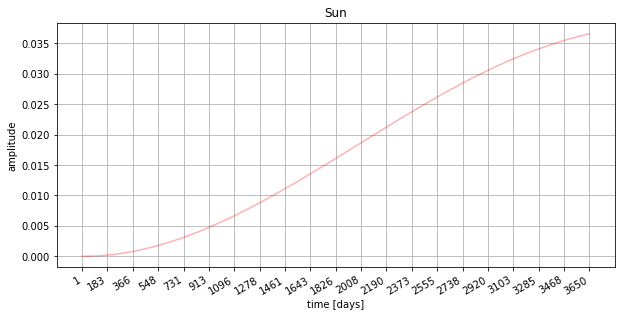

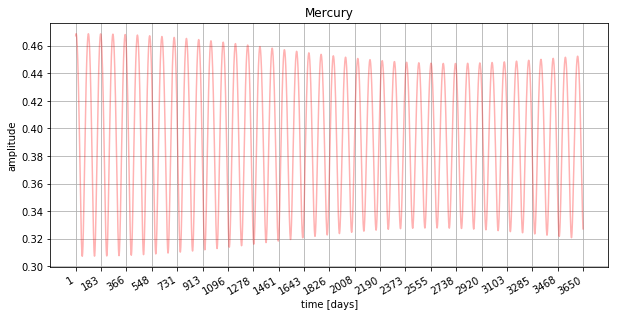

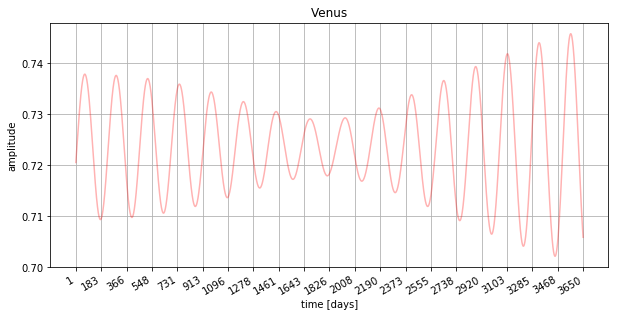

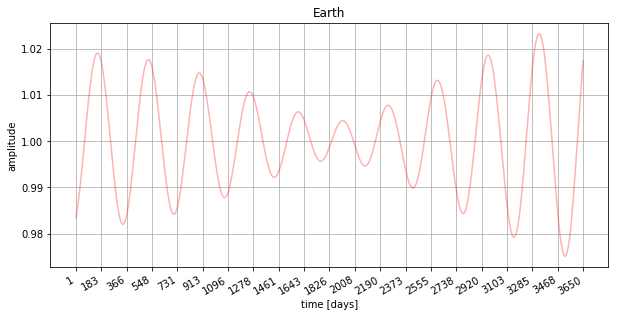

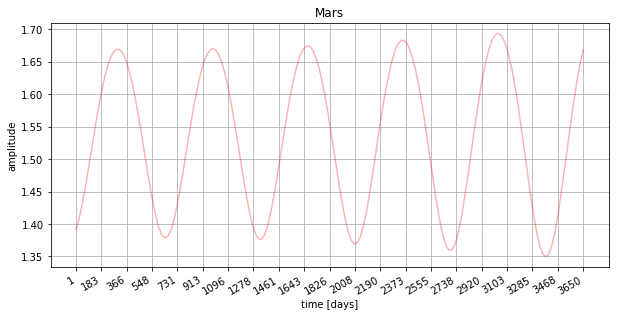

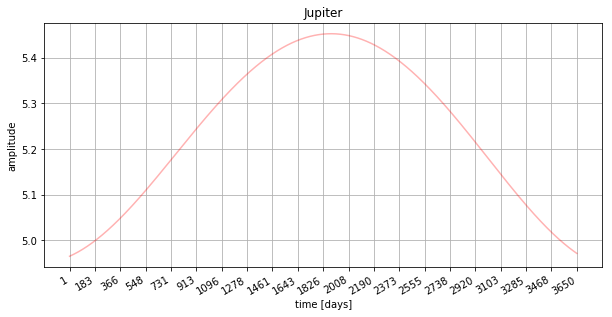

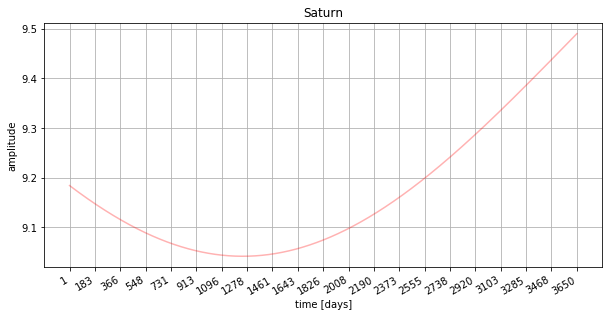

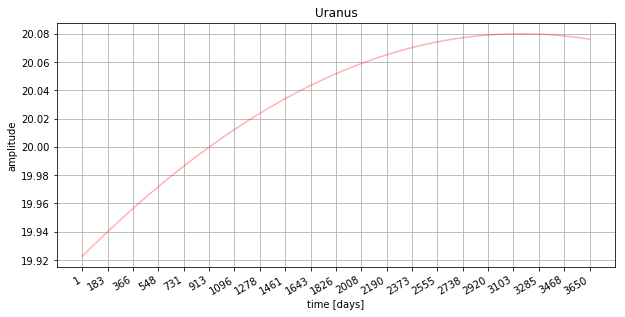

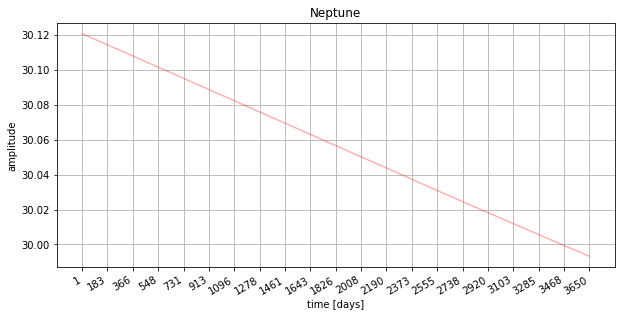

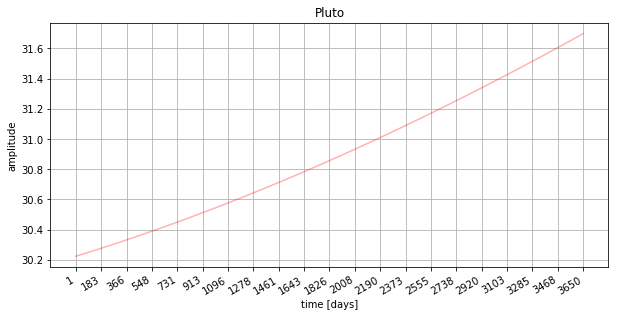

In [56]:
from matplotlib.pyplot import figure, show
from numpy import linspace

N= 10*365
t = linspace(1,N,N)
def makeFig(i, objectNames, x0, y0, z0):
    #print(len(x0))
    r = (x0**2 + y0**2 + z0**2)**0.5
    fig = figure(figsize=[10, 5])
    frame = fig.add_subplot(1, 1, 1)
    frame.plot(t, r[:N], 'r', alpha=0.3)#, label=f'x{i}')
    frame.set_xlabel('time [days]')
    frame.set_xticks(linspace(min(t), max(t), 21))
    frame.set_ylabel('amplitude')
    frame.set_title(objectNames[i])
    frame.axis('auto')
    frame.grid()
    frame.legend()
    fig.autofmt_xdate()
for j in range(N):
    ss.evolve()
    print(new_posarray)
for idx, b in enumerate(ss.bodies):
    makeFig(idx, bodies, np.array(b.x), np.array(b.y), np.array(b.z))
show()
